# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

---

## Zestaw zadań 2: Badanie intensywności procesów punktowych (część 1)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")
from math import pi as pi
import random
import math

In [2]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    a = abs(x_lim[1] - x_lim[0]) * abs(y_lim[1] - y_lim[0])
    n = np.random.poisson(intensity*a)
    x = x_lim[0] + (x_lim[1]-x_lim[0]) * np.random.rand(n)
    y = y_lim[0] + (y_lim[1]-y_lim[0]) * np.random.rand(n)
    return pd.DataFrame({'X':x, 'Y':y})

def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    def fun_neg(x):
        return -intensity_function(x[0],x[1])
    
    bd = ((x_lim[0],x_lim[1]),(y_lim[0],y_lim[1]))
    xy0=((x_lim[0]+x_lim[1])/2,(y_lim[0]+y_lim[1])/2)
    res = sp.optimize.minimize(fun_neg, x0=xy0, bounds=bd, tol=1e-10)
    
    intensity_max = -res.fun
    df3 = homogeneous_poisson_on_rectangle(intensity_max, x_lim, y_lim)
    
    p = len(df3)
    for i in range(0, p):
        a = 1-intensity_function(df3.X[i],df3.Y[i])/intensity_max
        if(a > np.random.random() ):
            df3.drop(index=i, inplace=True)
    
    return df3

def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    def hom_in_radius(intensity, x, y):
        a = math.pi*cluster_radius*cluster_radius
        var=intensity*a  #wartość oczekiwana
        n=np.random.poisson(var)  #liczba punktów
        wsp_los_x = []
        wsp_los_y = []
        for i in range(n):
            r = cluster_radius * math.sqrt( random.uniform(0,1) )
            alpha = 2*math.pi*random.uniform(0,1)
            wsp_los_x.append( r * math.cos(alpha) + x )
            wsp_los_y.append( r * math.sin(alpha) + y )
        
        #dataframe z współrzednymi
        df=pd.DataFrame({'X':wsp_los_x,'Y':wsp_los_y})
        return df
        
    x_lim_new=[x_lim[0]-cluster_radius,x_lim[1]+cluster_radius] #rozmiar okna powiększony o r
    y_lim_new=[y_lim[0]-cluster_radius,y_lim[1]+cluster_radius]
    
    h_p = homogeneous_poisson_on_rectangle(parent_intensity, [x_lim_new[0],x_lim_new[1]], [y_lim_new[0],y_lim_new[1]])
    x=h_p["X"]
    y=h_p["Y"]
    
    #dodawanie punktow w okręgu
    for i in zip(x,y):
        df=hom_in_radius(daughter_intensity,i[0],i[1])
        x=np.append(x,df["X"])
        y=np.append(y,df["Y"])
        
    tab=pd.DataFrame({'X':x, 'Y':y})
    tab = tab[(tab['X']<x_lim[1]) & (tab['X']>x_lim[0]) & (tab['Y']<y_lim[1]) & (tab['Y']>y_lim[0])]
    return tab

def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    bufor = 4 * cluster_sigma
    x_limr = [x_lim[0]-bufor, x_lim[1]+bufor]
    y_limr = [y_lim[0]-bufor, y_lim[1]+bufor]
    
    df = homogeneous_poisson_on_rectangle(parent_intensity, x_limr, y_limr)
    
    df["n"] = np.random.poisson(mean_cluster_size, len(df))
    
    x = np.empty(0)
    y = np.empty(0)
    for i in range(len(df)):
        x=np.append(x, np.random.normal(df["X"][i], cluster_sigma, df["n"][i]))
        y=np.append(y, np.random.normal(df["Y"][i], cluster_sigma, df["n"][i]))
 
    ret = pd.DataFrame({'X':x, 'Y':y})
    ret = ret[(ret['X']>x_lim[0]) & (ret['X']<x_lim[1]) & (ret['Y']>y_lim[0]) & (ret['Y']<y_lim[1])]
    return ret

### Przygotowanie danych (5 pkt)

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkłada Poissona:
 - intensywność procesu: 20
 
Niejednorodny rozkład Poissona:
 - intensywność procesu: f(x, y) = $10(cos(\frac{\pi}{4} x)+1)$

Rozkład Materna:
 - intensywność procesu macierzystego: 0.15
 - intensywność procesu potomnego: 15
 - promień klastra: 1.25
 
Rozkład Thomasa:
 - intensywność procesu macierzystego: 0.3
 - średnia liczebność klastra: 20
 - odchylenie standardowe klastra: 0.75

Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [-10, 10]
 - zakres wartości współrzędnej y: [-5, 5]

In [14]:
# YOUR CODE HERE
# raise NotImplementedError()
def fun(x,y):
    return 10*(np.cos(pi*x/4)+1)
djp = homogeneous_poisson_on_rectangle(20, [-10,10], [-5,5])
dnp = unhomogeneous_poisson_on_rectangle(fun, [-10,10], [-5,5])
#dnp.reindex()
dm  = materna_on_rectangle(0.15, 15, 1.25, [-10,10], [-5,5])
dt  = thomas_on_rectangle(0.3, 20, 0.75, [-10,10], [-5,5])

### Zadanie 1: Badanie intensywności procesu punktowego metodą szacowania lokalnego (20 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie prostokątnych podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie prostokątnych podobszarów.

Następnie wykorzystaj przygotowane funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Ustaw podział obszaru na 40 podobszarów wzdłuż osi $x$ i 20 podobszarów wzdłuż osi $y$.

Przedstaw wyniki analizy graficznie w postaci histogramów dwuwymiarowych z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

#### a) Przygotowanie funkcji

In [15]:
def point_count_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    counted, pkx, pky = np.histogram2d(points['X'], points['Y'], bins=bins, range=[x_lim,y_lim])
    counted = np.transpose(counted)
    return [counted,pkx,pky]
    
def intensity_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z wartością intensywności przypisaną do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[9, 12], [13, 8]])]
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    c,x,y = point_count_on_subregions(points, bins, x_lim, y_lim) 
    pole = abs(x[1]-x[0])*abs(y[1]-y[0])
    c = c/pole
    return c,x,y

#### b) Wygenerowanie danych

In [16]:
# YOUR CODE HERE
#raise NotImplementedError()
cjp, cjp_x, cjp_y = intensity_on_subregions(djp, [40,20], [-10,10], [-5,5])
cnp, cnp_x, cnp_y = intensity_on_subregions(dnp, [40,20], [-10,10], [-5,5])
cm, cm_x, cm_y  = intensity_on_subregions(dm,  [40,20], [-10,10], [-5,5])
ct, ct_x, ct_y  = intensity_on_subregions(dt,  [40,20], [-10,10], [-5,5])

#### c) Wizualizacja

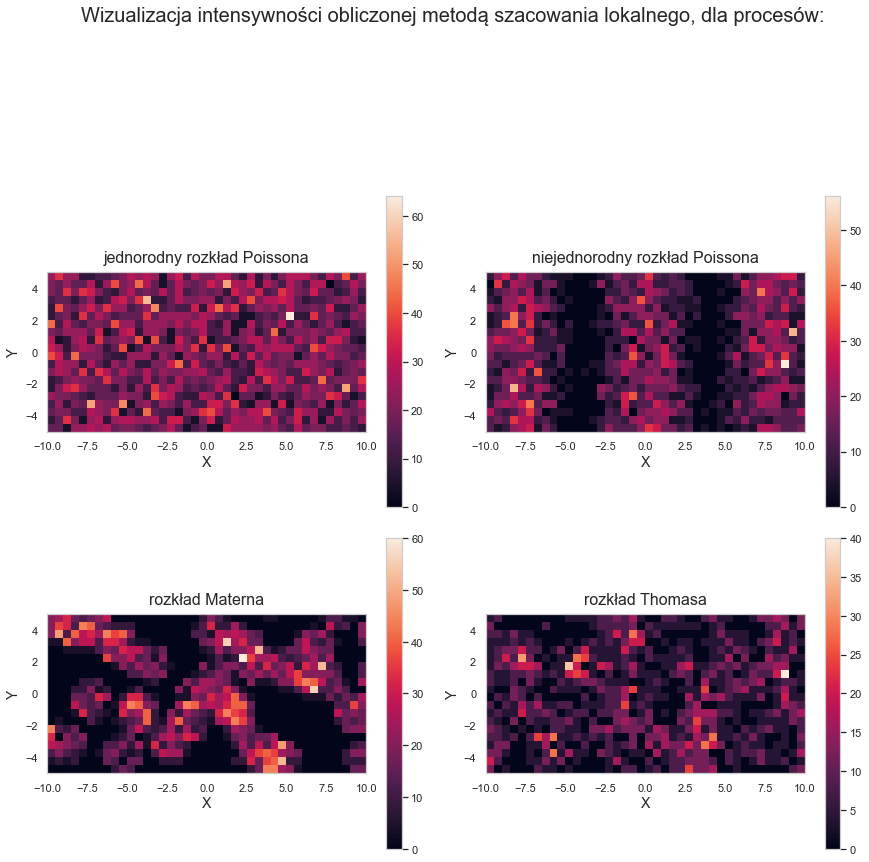

In [21]:
# YOUR CODE HERE
#raise NotImplementedError()
fig, ax = plt.subplots(2,2,figsize=(15,12))
plt.subplots_adjust(hspace=0.1, wspace=0.1)

fig.suptitle("Wizualizacja intensywności obliczonej metodą szacowania lokalnego, dla procesów:", fontsize=20, y=1.1)

a2 = ax[0][0].pcolormesh(cjp_x, cjp_y, cjp)
ax[0][0].set_xlabel("X", fontsize=14)
ax[0][0].set_ylabel("Y", fontsize=14)
ax[0][0].set_title('jednorodny rozkład Poissona',fontsize=16, pad=10)
ax[0][0].set_aspect(aspect=1, adjustable='box', anchor=None, share=False)
fig.colorbar(a2)

a3 = ax[0][1].pcolormesh(cnp_x, cnp_y, cnp)
ax[0][1].set_xlabel("X", fontsize=14)
ax[0][1].set_ylabel("Y", fontsize=14)
ax[0][1].set_title('niejednorodny rozkład Poissona',fontsize=16, pad=10)
ax[0][1].set_aspect(aspect=1, adjustable='box', anchor=None, share=False)
fig.colorbar(a3)

a4 = ax[1][0].pcolormesh(cm_x, cm_y, cm)
ax[1][0].set_xlabel("X", fontsize=14)
ax[1][0].set_ylabel("Y", fontsize=14)
ax[1][0].set_title('rozkład Materna',fontsize=16, pad=10)
ax[1][0].set_aspect(aspect=1, adjustable='box', anchor=None, share=False)
fig.colorbar(a4)

a5 = ax[1][1].pcolormesh(ct_x, ct_y, ct)
ax[1][1].set_xlabel("X", fontsize=14)
ax[1][1].set_ylabel("Y", fontsize=14)
ax[1][1].set_title('rozkład Thomasa',fontsize=16, pad=10)
ax[1][1].set_aspect(aspect=1, adjustable='box', anchor=None, share=False)
fig.colorbar(a5)

plt.show()

### Zadanie 2: Badanie intensywności procesu punktowego metodą funkcji jądrowych (25 pkt)

Przygotuj funkcję `intensity_on_kde()`, która będzie obliczać intensywność procesu punktowego z wykorzystaniem jądrowego estymatora funkcji intensywności danego wzorem:
$$ 	\grave{\lambda}(x,y) = \sum_{d_i < \tau} \frac{3}{\pi \tau^2} (1-\frac{d_i^2}{\tau^2})^2$$ 

gdzie: $d_i$ - odległość punktu od centrum funkcji jądrowej, $\tau$ - promień funkcji jądrowej.

Następnie wykorzystaj przygotowaną funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Wykonaj obliczania dla promienia funkcji jądrowej równego 1.5 i siatki  200x100 regularnie rozłożonych i pokrywających cały obszar punktów.

Przedstaw wyniki analizy graficznie w postaci wykresów konturowych z wypełnieniem z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

Uwaga! Funkcja przygotowana według powyższych wytycznych nie ma wbudowanego mechanizmu korekty na efekt brzegowy, w związu z czym będzie zaniżać wartość intensywności przy krawędziach analizowanego obszaru.

#### a) Przygotowanie funkcji

In [22]:
def intensity_on_kde(points, kernel_radius, grid, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    grid: list
        Lista określająca liczbę punktów w poziomie i pionie, dla których wyliczane będą wartości intensywności.
        Przykład: [10, 10]
    kernel_radius: float
        Liczba dodatnia określająca promień funkcji jądrowej.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: DataFrame
        Tablica zawierająca trzy kolumny - dwie ze współrzędnymi opisane jako "X" i "Y"
        oraz kolumnę z wartościami intensywności wyliczonymi dla tych współrzędnych opisaną jako "I".
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    pkx = np.linspace(x_lim[0], x_lim[1], grid[0])
    pky = np.linspace(y_lim[0], y_lim[1], grid[1])
    pomx, pomy = np.meshgrid(pkx,pky)  
    px = np.array([item for sublist in pomx for item in sublist])
    py = np.array([item for sublist in pomy for item in sublist])
    I=np.zeros(len(px))
    
    xs = np.array(points['X'])
    ys = np.array(points['Y'])
    
    for i in range(0,len(px)):
        d = ((px[i]-xs)*(px[i]-xs) + (py[i]-ys)*(py[i]-ys))**0.5
        d = d[d<kernel_radius]
        d = 3*((1-d*d/(kernel_radius*kernel_radius))**2)/(math.pi*kernel_radius*kernel_radius)
        I[i] = np.sum(d)
                    
    return pd.DataFrame({'X':px, 'Y':py, 'I':I})

#### b) Wygenerowanie danych

In [23]:
# YOUR CODE HERE
# raise NotImplementedError()
d2 = intensity_on_kde(djp,1.5,[200,100],[-10,10],[-5,5])
d3 = intensity_on_kde(dnp,1.5,[200,100],[-10,10],[-5,5])
d4 = intensity_on_kde(dm,1.5,[200,100],[-10,10],[-5,5])
d5 = intensity_on_kde(dt,1.5,[200,100],[-10,10],[-5,5])

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


#### c) Wizualizacja

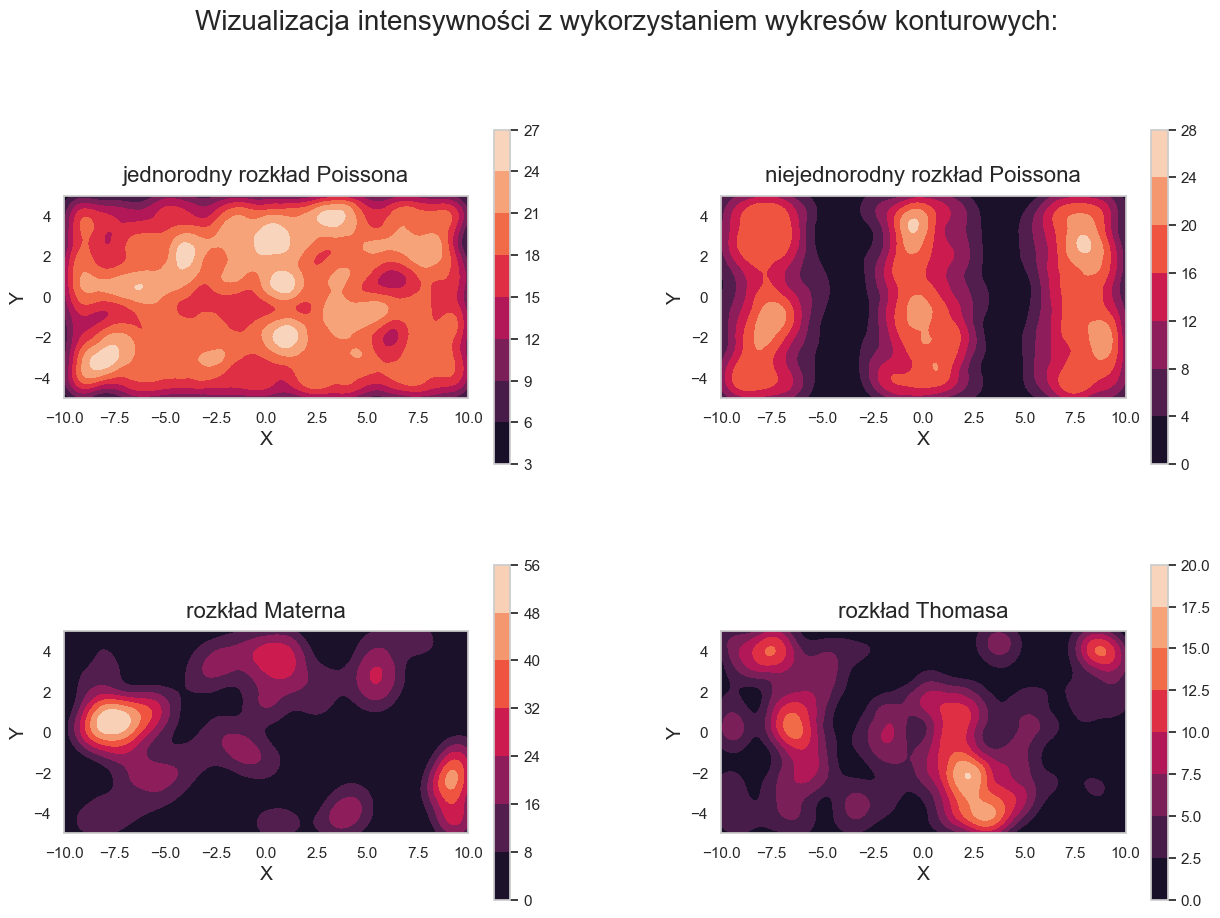

In [11]:
# YOUR CODE HERE
#raise NotImplementedError()
fig, ax = plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

fig.suptitle("Wizualizacja intensywności z wykorzystaniem wykresów konturowych:", fontsize=20, y=1.0)

a2 = ax[0][0].tricontourf(d2['X'], d2['Y'], d2['I'])
ax[0][0].set_xlabel("X", fontsize=14)
ax[0][0].set_ylabel("Y", fontsize=14)
ax[0][0].set_title('jednorodny rozkład Poissona',fontsize=16, pad=10)
ax[0][0].set_xlim(left=-10,right=10)
ax[0][0].set_ylim(bottom=-5,top=5)
ax[0][0].set_aspect(aspect=1, adjustable='box', anchor=None, share=False)
fig.colorbar(a2)

a3 = ax[0][1].tricontourf(d3['X'], d3['Y'], d3['I'])
ax[0][1].set_xlabel("X", fontsize=14)
ax[0][1].set_ylabel("Y", fontsize=14)
ax[0][1].set_title('niejednorodny rozkład Poissona',fontsize=16, pad=10)
ax[0][1].set_xlim(left=-10,right=10)
ax[0][1].set_ylim(bottom=-5,top=5)
ax[0][1].set_aspect(aspect=1, adjustable='box', anchor=None, share=False)
fig.colorbar(a3)

a4 = ax[1][0].tricontourf(d4['X'], d4['Y'], d4['I'])
ax[1][0].set_xlabel("X", fontsize=14)
ax[1][0].set_ylabel("Y", fontsize=14)
ax[1][0].set_title('rozkład Materna',fontsize=16, pad=10)
ax[1][0].set_xlim(left=-10,right=10)
ax[1][0].set_ylim(bottom=-5,top=5)
ax[1][0].set_aspect(aspect=1, adjustable='box', anchor=None, share=False)
fig.colorbar(a4)

a5 = ax[1][1].tricontourf(d5['X'], d5['Y'], d5['I'])
ax[1][1].set_xlabel("X", fontsize=14)
ax[1][1].set_ylabel("Y", fontsize=14)
ax[1][1].set_title('rozkład Thomasa',fontsize=16, pad=10)
ax[1][1].set_xlim(left=-10,right=10)
ax[1][1].set_ylim(bottom=-5,top=5)
ax[1][1].set_aspect(aspect=1, adjustable='box', anchor=None, share=False)
fig.colorbar(a5)

plt.show()